# Car price-Prediction


#### Problem Statement:

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market

Essentially, the company wants to know —

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car


## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the CarPrice dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_rows", 50000, "display.max_columns", 10000, "display.max_colwidth", None, "display.max_info_columns", 5000)

In [3]:
carprice = pd.read_csv("C:/Users/Documents/CarPrice.csv")

In [4]:
# Check the head of the dataset
carprice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Inspect the various aspects of the carprice dataframe

In [5]:
carprice.shape

(205, 26)

In [6]:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
carprice.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Data Cleaning

- We can see that All columns are `NOT NULL` i.e. none of the columns has NULL values. So we dont need to handle any NULL values

- The `CarName` column has 2 values : Car company Name and Car model. We will separate these values and store company name in a separate column

In [8]:
#Create a new column 'carcompanyname' which holds only name of the car in df carprice
carprice["carcompanyname"]=carprice["CarName"].apply(lambda x: x.split()[0])

In [9]:
carprice[["carcompanyname","CarName"]].head()

,carcompanyname,CarName
0,alfa-romero,alfa-romero giulia
1,alfa-romero,alfa-romero stelvio
2,alfa-romero,alfa-romero Quadrifoglio
3,audi,audi 100 ls
4,audi,audi 100ls


- We dont want `Carmodel`. So we are not going to store it.

In [10]:
## Drop the original column CarName because its not required
carprice.drop(['CarName'], axis = 1, inplace = True)

In [11]:
### See the data in carcompanyname 
carprice.carcompanyname.value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
renault         2
vw              2
maxda           2
mercury         1
porcshce        1
Nissan          1
vokswagen       1
toyouta         1
Name: carcompanyname, dtype: int64

- We can see the `carcompanyname` values has data quality issue. Some names are mispelled like toyouta. Lets correct those names.

In [12]:
 
carprice["carcompanyname"]=carprice["carcompanyname"].apply(lambda x: "nissan" if x == "Nissan" else x)
carprice["carcompanyname"]=carprice["carcompanyname"].apply(lambda x: "volkswagen" if x == "vw" else x)
carprice["carcompanyname"]=carprice["carcompanyname"].apply(lambda x: "volkswagen" if x == "vokswagen" else x)
carprice["carcompanyname"]=carprice["carcompanyname"].apply(lambda x: "toyota" if x == "toyouta" else x)
carprice["carcompanyname"]=carprice["carcompanyname"].apply(lambda x: "porsche" if x == "porcshce" else x)
carprice["carcompanyname"]=carprice["carcompanyname"].apply(lambda x: "mazda" if x == "maxda" else x)
        

In [13]:
### See the data in carcompanyname
carprice.carcompanyname.value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
alfa-romero     3
jaguar          3
chevrolet       3
renault         2
mercury         1
Name: carcompanyname, dtype: int64

## Step 2: Visualising the Data


- We will try to catch up obvious multicollinearity between independent variables
- We will also identify if some predictors directly have a strong linear association with the outcome variable and so the feasibility of using Linear regression model


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

#### First we will delete the variable car_ID which is not busiess significant and not useful for our analysis.

In [15]:
## Delete car_ID column b'cos its not useful in visualization and analysis
carprice.drop(['car_ID'], axis = 1, inplace = True)

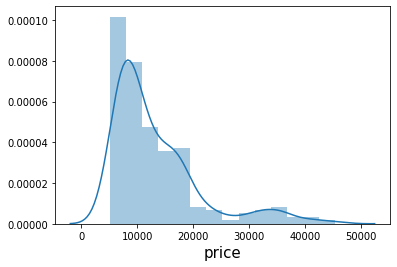

In [16]:
#Check the distribution of price
sns.set_context( rc={"axes.labelsize":15, "xtick.labelsize":10, "ytick.labelsize":10})
sns.distplot(carprice.price)

#### Since the numeric variables are high in number, we will divide the variables in three different sets and plot the scatter plot for them. 

In [17]:
#### Please note that command to plot pairplot take little longer time than the other commands

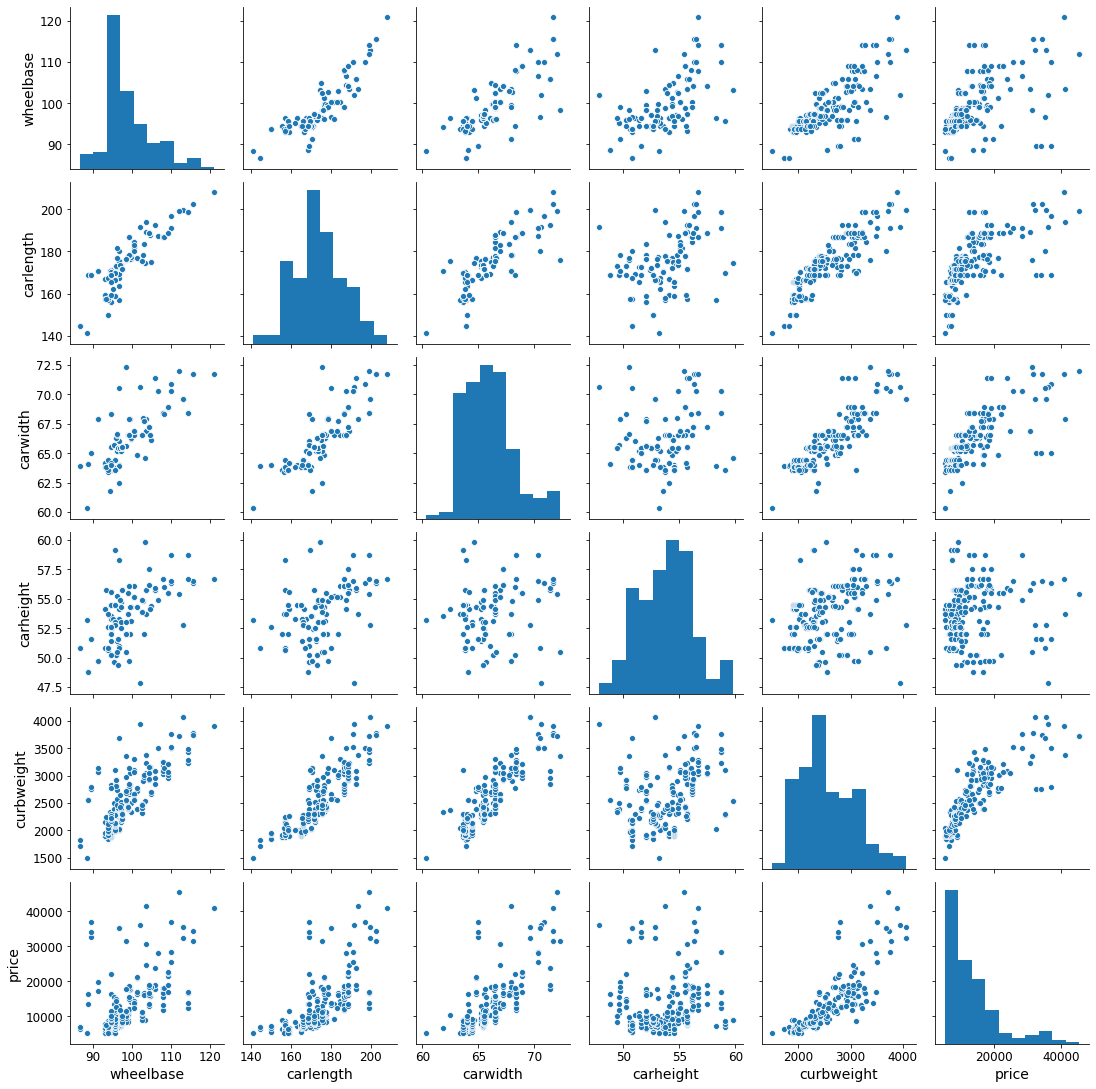

In [18]:
##First set of columns for plotting pairplot
sns.set_context( rc={"axes.labelsize":14, "xtick.labelsize":12, "ytick.labelsize":12})

sns.pairplot(carprice, vars=["wheelbase","carlength","carwidth","carheight","curbweight","price"])  

#### From above plots, it looks like price has linear relationship with carwidth and curbweight and somewhat linear with carlength & wheelbase. We also notice that there is relationship between different independent variables such as carwidth, carlength, curbweight & wheelbase

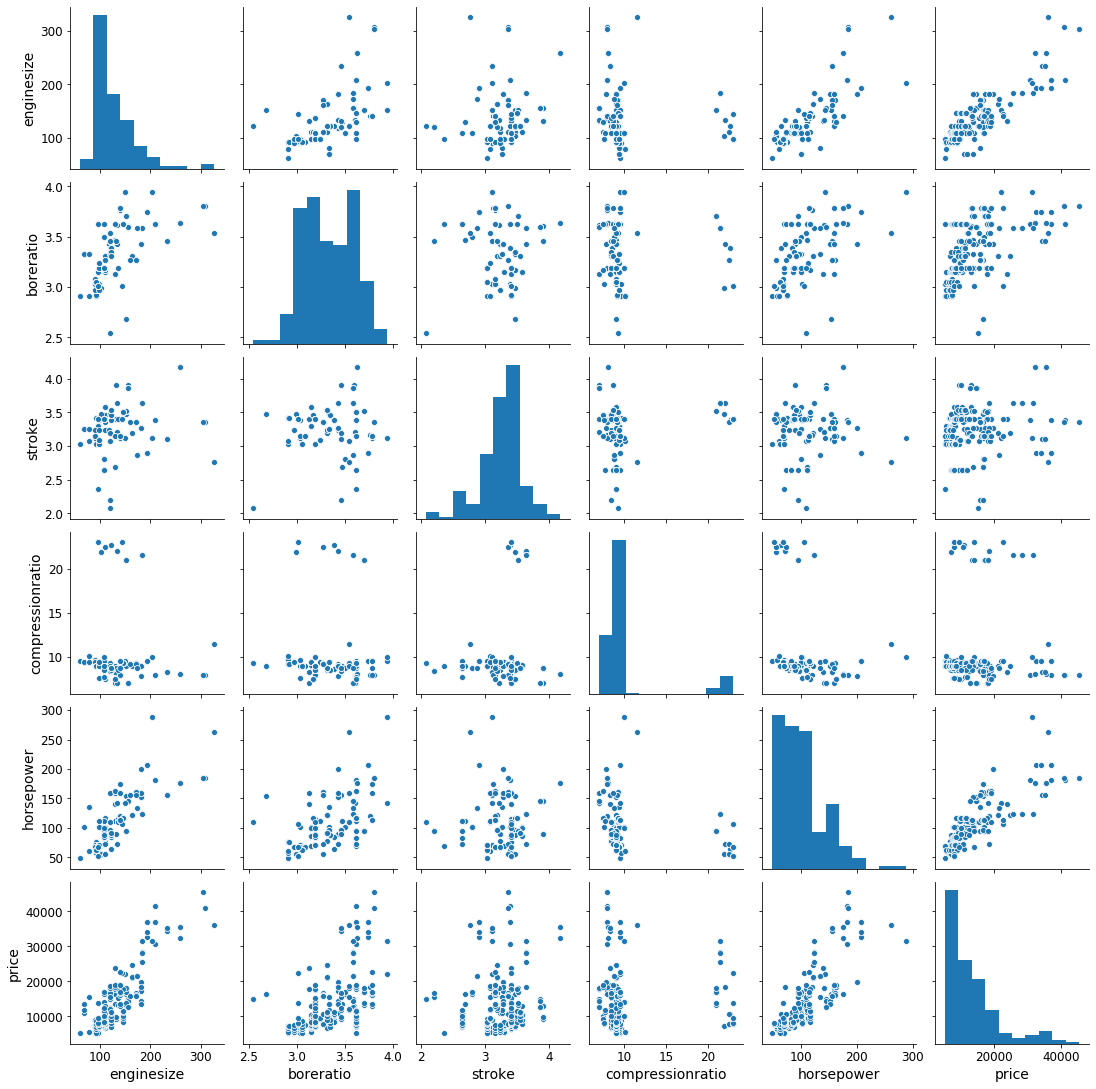

In [19]:
##Second set of columns for plotting pairplot
sns.set_context( rc={"axes.labelsize":14, "xtick.labelsize":12, "ytick.labelsize":12})
sns.pairplot(carprice, vars=["enginesize","boreratio","stroke","compressionratio","horsepower","price"])

#### From above plots, it seems price has linear relationship with 1) enginesize 2) horsepower 

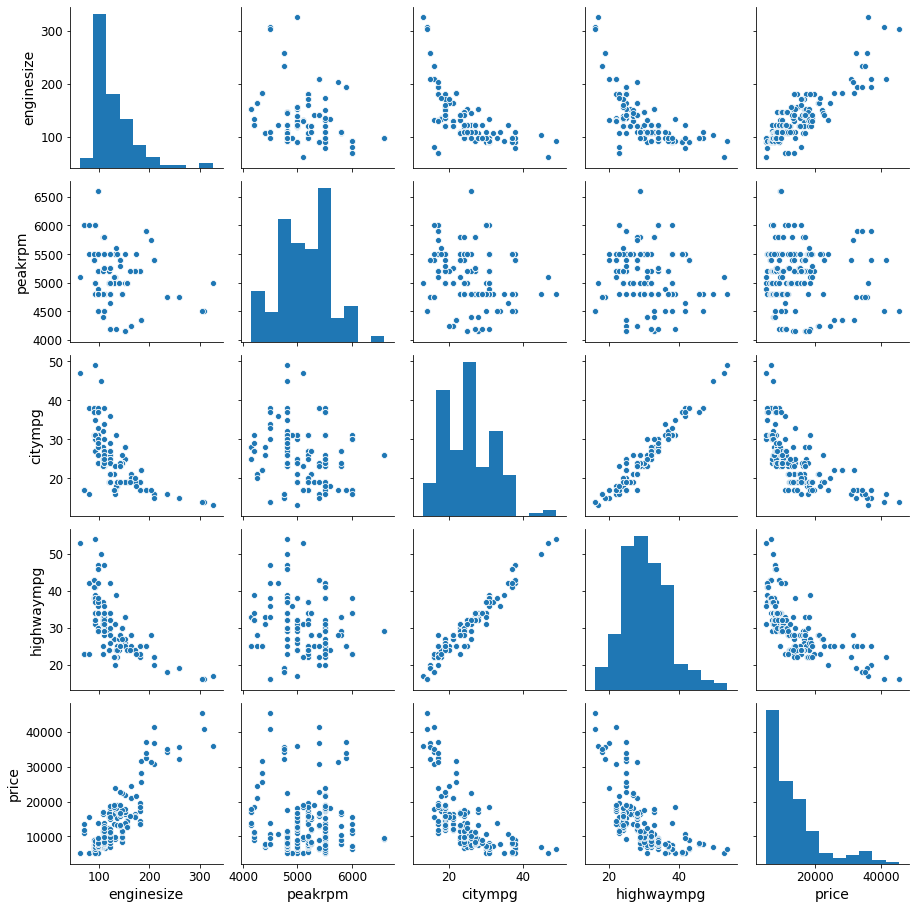

In [20]:
##Third  set of columns for plotting pairplot. Using enginesize column again 
sns.pairplot(carprice,vars=["enginesize", "peakrpm","citympg","highwaympg","price"]) 

#### From above plots, it seems price has kind of reverse linear relationship with citympg and highwaympg. We also notice that there is relationship  among different independent variables such as enginesize, citympg and highwaympg

### The pairplot analysis show that Linear regression model can be used to find out driving factors for price

#### Visualising Categorical Variables

Let's make a boxplot for categorical variables.

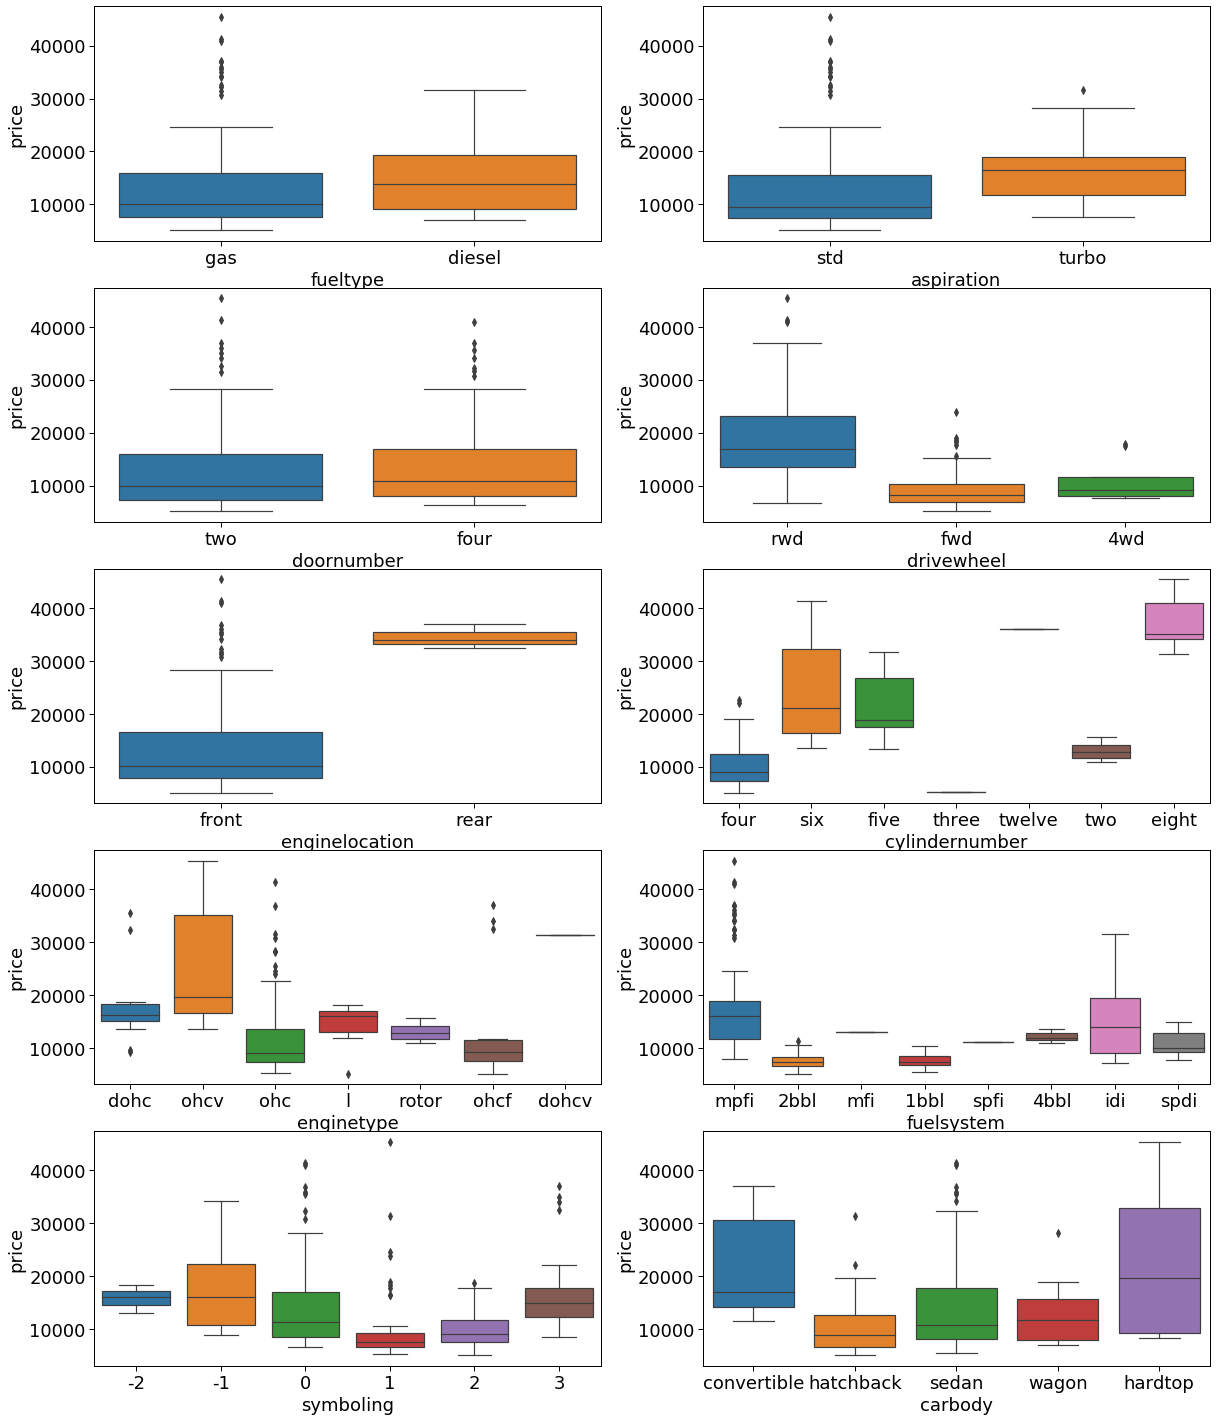

In [21]:
plt.figure(figsize=(20,25))
sns.set_context("paper", rc={"axes.labelsize":18, "xtick.labelsize":18, "ytick.labelsize":18})
plt.subplot(5,2,1)
sns.boxplot(x = 'fueltype', y = 'price', data = carprice)
plt.subplot(5,2,2)
sns.boxplot(x = 'aspiration', y = 'price', data = carprice)
plt.subplot(5,2,3)
sns.boxplot(x = 'doornumber', y = 'price', data = carprice)
plt.subplot(5,2,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = carprice)
plt.subplot(5,2,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = carprice)
plt.subplot(5,2,6)
sns.boxplot(x = 'cylindernumber', y = 'price', data = carprice)
plt.subplot(5,2,7)
sns.boxplot(x = 'enginetype', y = 'price', data = carprice)
plt.subplot(5,2,8)
sns.boxplot(x = 'fuelsystem', y = 'price', data = carprice)
plt.subplot(5,2,9)
sns.boxplot(x = 'symboling', y = 'price', data = carprice)
plt.subplot(5,2,10)
sns.boxplot(x = 'carbody', y = 'price', data = carprice)
plt.show()

#### As we can see, there is increase and decrease in price based on the values of categorical variables.
- Cars with enginelocation = 'rear' are much pricy than cars with enginelocation = 'front'. 
- Cars with Aspiration = 'Turbo' are priced higher than others.
- Cars with Drivewheel = 'rwd' are costlier than ones with other drivewheels. 
- Enginetype = 'ohcv' makes the car price higher. 

## Step 3: Data Preparation

### Encoding

### Binary Variables

We can see that dataset has many columns with only 2 values. In order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s.

#### doornumber

In [22]:
carprice["doornumber"].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [23]:
carprice["doornumber"] = carprice["doornumber"].apply(lambda x: 0 if x == 'two' else 1)

In [24]:
carprice["doornumber"].value_counts()

1    115
0     90
Name: doornumber, dtype: int64

#### fueltype

In [25]:
carprice["fueltype"].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [26]:
carprice["fueltype"] = carprice["fueltype"].apply(lambda x: 0 if x == 'diesel' else 1)

In [27]:
carprice["fueltype"].value_counts()

1    185
0     20
Name: fueltype, dtype: int64

#### aspiration

In [28]:
carprice["aspiration"].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [29]:
carprice["aspiration"] = carprice["aspiration"].apply(lambda x: 0 if x == 'std' else 1)

In [30]:
carprice["aspiration"].value_counts()

0    168
1     37
Name: aspiration, dtype: int64

#### enginelocation

In [31]:
carprice["enginelocation"].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [32]:
carprice["enginelocation"] = carprice["enginelocation"].apply(lambda x: 0 if x == 'front' else 1)

In [33]:
carprice["enginelocation"].value_counts()

0    202
1      3
Name: enginelocation, dtype: int64

### Dummy Variables

We can see that dataset has many columns with fixed level of values. In order to fit a regression line, we would need numerical values and not string. So we need to convert these levels to integer.

#### Below variables have more than two levels. We need to convert these levels into integer:
#### symboling , carbody, drivewheel, enginetype, cylindernumber, fuelsystem. For this, we will use `dummy variables`.

#### symboling

In [34]:
# Get the dummy variables for the feature 'symboling' and store it in a new variable - 'symbolingDummy'
symbolingDummy = pd.get_dummies(carprice['symboling'])

In [35]:
# Check what the dataset 'symbolingDummy' looks like
symbolingDummy.head()

,-2,-1,0,1,2,3
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,1,0,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0


Now, you don't need 6 columns. You can drop the `-2` column, as the carbody can be identified with just the last 5 columns where — 
- `00000` will correspond to `-2`
- `00001` will correspond to `3`
- `00010` will correspond to `2`
- `00100` will correspond to `1`
- `01000` will correspond to `0`
- `10000` will correspond to `-1`

In [36]:
# Let's drop the first column from symbolingDummy df using 'drop_first = True'

symbolingDummy = pd.get_dummies(carprice['symboling'], drop_first = True)

In [37]:
# Add the results to the original carprice dataframe

carprice = pd.concat([carprice, symbolingDummy], axis = 1)

In [38]:
carprice = carprice.reset_index(drop=True)

In [39]:
# Drop 'symboling' as we have created the dummies for it

carprice.drop(['symboling'], axis = 1, inplace = True)

In [40]:
carprice.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carcompanyname,-1,0,1,2,3
0,1,0,0,convertible,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,0,0,0,0,1
1,1,0,0,convertible,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,0,0,0,0,1
2,1,0,0,hatchback,rwd,0,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,0,0,1,0,0
3,1,0,1,sedan,fwd,0,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,0,0,0,1,0
4,1,0,1,sedan,4wd,0,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,0,0,0,1,0


#### carbody

In [41]:
# Get the dummy variables for the feature 'carbody' and store it in a new variable - 'carbodyDummy'
carbodyDummy = pd.get_dummies(carprice['carbody'])

In [42]:
# Check what the dataset 'carbodyDummy' looks like
carbodyDummy.head()

,convertible,hardtop,hatchback,sedan,wagon
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


Now, you don't need five columns. You can drop the `convertible` column, as the carbody can be identified with just the last four columns where — 
- `0000` will correspond to `convertible`
- `0001` will correspond to `wagon`
- `0010` will correspond to `sedan`
- `0100` will correspond to `hatchback`
- `1000` will correspond to `hardtop`

In [43]:
# Let's drop the first column from carbodyDummy df using 'drop_first = True'

carbodyDummy = pd.get_dummies(carprice['carbody'], drop_first = True)

In [44]:
# Add the results to the original carprice dataframe

carprice = pd.concat([carprice, carbodyDummy], axis = 1)

In [45]:
carprice = carprice.reset_index(drop=True)

In [46]:
# Drop 'carbody' as we have created the dummies for it

carprice.drop(['carbody'], axis = 1, inplace = True)

In [47]:
carprice.head()

,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carcompanyname,-1,0,1,2,3,hardtop,hatchback,sedan,wagon
0,1,0,0,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,0,0,0,0,1,0,0,0,0
1,1,0,0,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,0,0,0,0,1,0,0,0,0
2,1,0,0,rwd,0,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,0,0,1,0,0,0,1,0,0
3,1,0,1,fwd,0,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,0,0,0,1,0,0,0,1,0
4,1,0,1,4wd,0,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,0,0,0,1,0,0,0,1,0


#### drivewheel

In [48]:
# Get the dummy variables for the feature 'drivewheel' and store it in a new variable - 'drivewheelDummy'
drivewheelDummy = pd.get_dummies(carprice['drivewheel'])

In [49]:
# Check what the dataset 'drivewheelDummy' looks like
drivewheelDummy.head()

,4wd,fwd,rwd
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,1,0,0


Now, you don't need 3 columns. You can drop the `4wd` column, as the drivewheel can be identified with just the last 2 columns where — 
- `00` will correspond to `4wd`
- `01` will correspond to `fwd`
- `10` will correspond to `rwd`


In [50]:
# Let's drop the first column from drivewheelDummy df using 'drop_first = True'

drivewheelDummy = pd.get_dummies(carprice['drivewheel'], drop_first = True)

In [51]:
# Add the results to the original carprice dataframe

carprice = pd.concat([carprice, drivewheelDummy], axis = 1)

In [52]:
carprice = carprice.reset_index(drop=True)

In [53]:
# Drop 'drivewheel' as we have created the dummies for it

carprice.drop(['drivewheel'], axis = 1, inplace = True)

In [54]:
carprice.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carcompanyname,-1,0,1,2,3,hardtop,hatchback,sedan,wagon,fwd,rwd
0,1,0,0,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,0,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,0,0,0,0,1,0,0,0,0,0,1
2,1,0,0,0,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,0,0,1,0,0,0,1,0,0,0,1
3,1,0,1,0,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,0,0,0,1,0,0,0,1,0,1,0
4,1,0,1,0,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,0,0,0,1,0,0,0,1,0,0,0


#### enginetype

In [55]:
# Get the dummy variables for the feature 'enginetype' and store it in a new variable - 'enginetypeDummy'
enginetypeDummy = pd.get_dummies(carprice['enginetype'])

In [56]:
# Check what the dataset 'enginetypeDummy' looks like
enginetypeDummy.head()

,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0


Now, you don't need 7 columns. You can drop the `dohc` column, as the drivewheel can be identified with just the last 6 columns where — 
- `000000` will correspond to `dohc`
- `000001` will correspond to `rotor`
- `000010` will correspond to `ohcv`
- `000100` will correspond to `ohcf`
- `001000` will correspond to `ohc`
- `010000` will correspond to `I`
- `100000` will correspond to `dohcv`

In [57]:
# Let's drop the first column from enginetypeDummy df using 'drop_first = True'

enginetypeDummy = pd.get_dummies(carprice['enginetype'], drop_first = True)

In [58]:
# Add the results to the original carprice dataframe

carprice = pd.concat([carprice, enginetypeDummy], axis = 1)

In [59]:
carprice = carprice.reset_index(drop=True)

In [60]:
# Drop 'enginetype' as we have created the dummies for it

carprice.drop(['enginetype'], axis = 1, inplace = True)

In [61]:
carprice.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carcompanyname,-1,0,1,2,3,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor
0,1,0,0,0,88.6,168.8,64.1,48.8,2548,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,88.6,168.8,64.1,48.8,2548,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,94.5,171.2,65.5,52.4,2823,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
3,1,0,1,0,99.8,176.6,66.2,54.3,2337,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0
4,1,0,1,0,99.4,176.6,66.4,54.3,2824,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0


#### cylindernumber

In [62]:
# Get the dummy variables for the feature 'cylindernumber' and store it in a new variable - 'cylindernumberDummy'
cylindernumberDummy = pd.get_dummies(carprice['cylindernumber'])

In [63]:
# Check what the dataset 'cylindernumberDummy' looks like
cylindernumberDummy.head()

,eight,five,four,six,three,twelve,two
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0


Now, you don't need 7 columns. You can drop the `eight` column, as the drivewheel can be identified with just the last 6 columns where — 
- `000000` will correspond to `eight`
- `000001` will correspond to `two`
- `000010` will correspond to `twelve`
- `000100` will correspond to `three`
- `001000` will correspond to `six`
- `010000` will correspond to `four`
- `100000` will correspond to `five`

In [64]:
# Let's drop the first column from cylindernumberDummy df using 'drop_first = True'

cylindernumberDummy = pd.get_dummies(carprice['cylindernumber'], drop_first = True)

In [65]:
# Add the results to the original carprice dataframe

carprice = pd.concat([carprice, cylindernumberDummy], axis = 1)

In [66]:
carprice = carprice.reset_index(drop=True)

In [67]:
# Drop 'cylindernumber' as we have created the dummies for it

carprice.drop(['cylindernumber'], axis = 1, inplace = True)

In [68]:
carprice.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carcompanyname,-1,0,1,2,3,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
0,1,0,0,0,88.6,168.8,64.1,48.8,2548,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,88.6,168.8,64.1,48.8,2548,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,94.5,171.2,65.5,52.4,2823,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
3,1,0,1,0,99.8,176.6,66.2,54.3,2337,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
4,1,0,1,0,99.4,176.6,66.4,54.3,2824,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


#### fuelsystem

In [69]:
# Get the dummy variables for the feature 'fuelsystem' and store it in a new variable - 'fuelsystemDummy'
fuelsystemDummy = pd.get_dummies(carprice['fuelsystem'])

In [70]:
# Check what the dataset 'fuelsystemDummy' looks like
fuelsystemDummy.head()

,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0


Now, you don't need 8 columns. You can drop the `1bbl` column, as the drivewheel can be identified with just the last 7 columns where — 
- `0000000` will correspond to `1bbl`
- `0000001` will correspond to `spfi`
- `0000010` will correspond to `mpfi`
- `0000100` will correspond to `mfi`
- `0001000` will correspond to `idi`
- `0010000` will correspond to `4bbl`
- `1000000` will correspond to `2bbl`

In [71]:
# Let's drop the first column from fuelsystemDummy df using 'drop_first = True'

fuelsystemDummy = pd.get_dummies(carprice['fuelsystem'], drop_first = True)

In [72]:
# Add the results to the original carprice dataframe

carprice = pd.concat([carprice, fuelsystemDummy], axis = 1)

In [73]:
carprice = carprice.reset_index(drop=True)

In [74]:
# Drop 'fuelsystem' as we have created the dummies for it

carprice.drop(['fuelsystem'], axis = 1, inplace = True)

#### carcompanyname

In [75]:
# Get the dummy variables for the feature 'carcompanyname' and store it in a new variable - 'carcompanynameDummy'
carcompanynameDummy = pd.get_dummies(carprice['carcompanyname'])

In [76]:
# Check what the dataset 'carcompanynameDummy' looks like
carcompanynameDummy.head()

,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Now, you don't need 23 columns. You can drop the 1st column, as the carcompanyname can be identified with the last 22 columns

In [77]:
# Let's drop the first column from carcompanynameDummy df using 'drop_first = True'

carcompanynameDummy = pd.get_dummies(carprice['carcompanyname'], drop_first = True)

In [78]:
# Add the results to the original carprice dataframe

carprice = pd.concat([carprice, carcompanynameDummy], axis = 1)

In [79]:
carprice = carprice.reset_index(drop=True)

In [80]:
# Drop 'carcompanyname' as we have created the dummies for it

carprice.drop(['carcompanyname'], axis = 1, inplace = True)

In [81]:
carprice.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,-1,0,1,2,3,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,0,0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets


In [82]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(carprice, train_size = 0.7, test_size = 0.3, random_state = 100)

In [83]:
df_train.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,-1,0,1,2,3,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
122,1,0,1,0,93.7,167.3,63.8,50.8,2191,98,2.97,3.23,9.4,68,5500,31,38,7609.0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
125,1,0,0,0,94.5,168.9,68.3,50.2,2778,151,3.94,3.11,9.5,143,5500,19,27,22018.0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
166,1,0,0,0,94.5,168.7,64.0,52.6,2300,98,3.24,3.08,9.4,112,6600,26,29,9538.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
199,1,1,1,0,104.3,188.8,67.2,57.5,3157,130,3.62,3.15,7.5,162,5100,17,22,18950.0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Rescaling the Features 

Here we can see that except for `peakrpm` & `curbweight`, all the columns have small values. So it is important to rescale the variables so that they have a comparable scale.We will use MinMax scaling.

In [84]:
from sklearn.preprocessing import MinMaxScaler

In [85]:
scaler = MinMaxScaler()

In [86]:
# Apply scaler() to all the columns except the '1-0' and 'dummy' variables
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight','enginesize',"boreratio","stroke","compressionratio","horsepower","peakrpm","citympg","highwaympg","price"]

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [87]:
df_train.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,-1,0,1,2,3,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
122,1,0,1,0,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,0.083333,0.551020,0.500000,0.567568,0.068818,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
125,1,0,0,0,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,0.395833,0.551020,0.166667,0.270270,0.466890,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
166,1,0,0,0,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324,0.122110,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,0.262500,0.346939,0.222222,0.270270,0.314446,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
199,1,1,1,0,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,0.475000,0.387755,0.111111,0.135135,0.382131,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [88]:
df_train.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,-1,0,1,2,3,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.909091,0.181818,0.559441,0.006993,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,0.497946,0.535389,0.190787,0.227302,0.400029,0.344211,0.374976,0.219310,0.090909,0.349650,0.300699,0.118881,0.125874,0.020979,0.342657,0.475524,0.132867,0.594406,0.349650,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0,0.034965,0.041958,0.034965,0.020979,0.041958,0.062937,0.020979,0.020979,0.090909,0.0,0.062937,0.097902,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958
std,0.288490,0.387050,0.498199,0.083624,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,0.207140,0.157843,0.237181,0.165511,0.196438,0.186165,0.188477,0.215682,0.288490,0.478536,0.460174,0.324786,0.332873,0.143818,0.476266,0.501156,0.340624,0.492733,0.478536,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0,0.184337,0.201198,0.184337,0.143818,0.201198,0.243703,0.143818,0.143818,0.288490,0.0,0.243703,0.298227,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,0.305556,0.464646,0.100000,0.091667,0.265306,0.166667,0.216216,0.067298,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,0.500000,0.545455,0.125000,0.191667,0.428571,0.333333,0.378378,0.140343,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0

In [89]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 122 to 8
Data columns (total 69 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fueltype          143 non-null    int64  
 1   aspiration        143 non-null    int64  
 2   doornumber        143 non-null    int64  
 3   enginelocation    143 non-null    int64  
 4   wheelbase         143 non-null    float64
 5   carlength         143 non-null    float64
 6   carwidth          143 non-null    float64
 7   carheight         143 non-null    float64
 8   curbweight        143 non-null    float64
 9   enginesize        143 non-null    float64
 10  boreratio         143 non-null    float64
 11  stroke            143 non-null    float64
 12  compressionratio  143 non-null    float64
 13  horsepower        143 non-null    float64
 14  peakrpm           143 non-null    float64
 15  citympg           143 non-null    float64
 16  highwaympg        143 non-null    float64
 1

#### Now lets plot the correlation map for these variables. Since the number of variables are very high,we will select few variables in 2 sets to plot correlation heatmap 

In [90]:
## Copy df_train to df_train_corr
df_train_corr=df_train.copy()

In [91]:
## Select few columns from df_train_corr to plot the first heatmap
df_train_corr1 = df_train_corr[["fueltype","aspiration","doornumber","enginelocation","wheelbase","carlength","carwidth","carheight","curbweight","enginesize","boreratio","stroke","compressionratio","horsepower","peakrpm","citympg","highwaympg","price"]]

In [92]:
## Select few columns from df_train_corr to plot the second heatmap
df_train_corr2 =  df_train_corr[[-1,0,1,2,3,"hardtop","hatchback","sedan","wagon","fwd","rwd","dohcv","l","ohc","ohcf","ohcv","rotor","five","four","six","three","twelve","two","2bbl","4bbl","idi","mfi","mpfi","spdi","spfi","price"]]

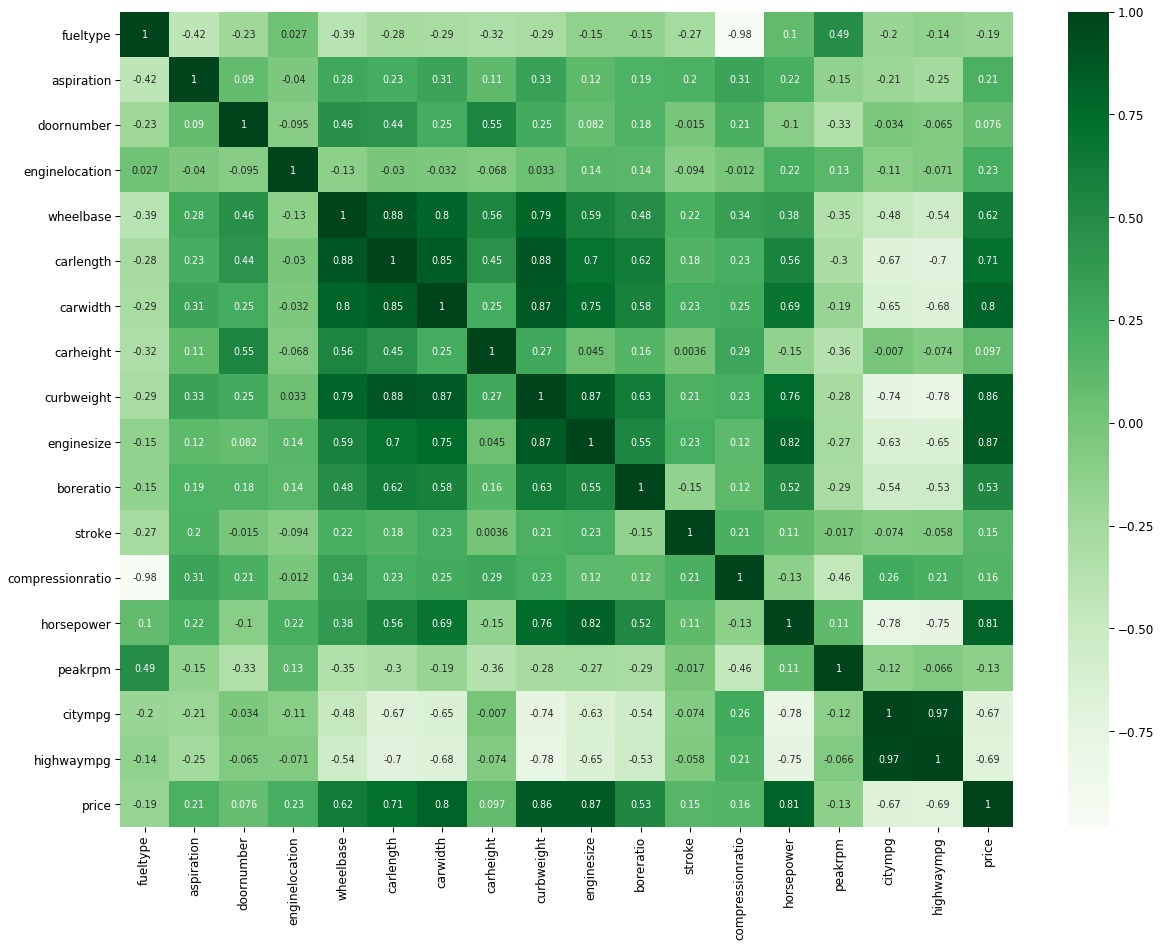

In [93]:
plt.figure(figsize = (20, 15))
sns.set_context("paper", rc={"axes.labelsize":16, "xtick.labelsize":12, "ytick.labelsize":12})
sns.heatmap(df_train_corr1.corr(), cmap= "Greens", annot = True)
plt.show()

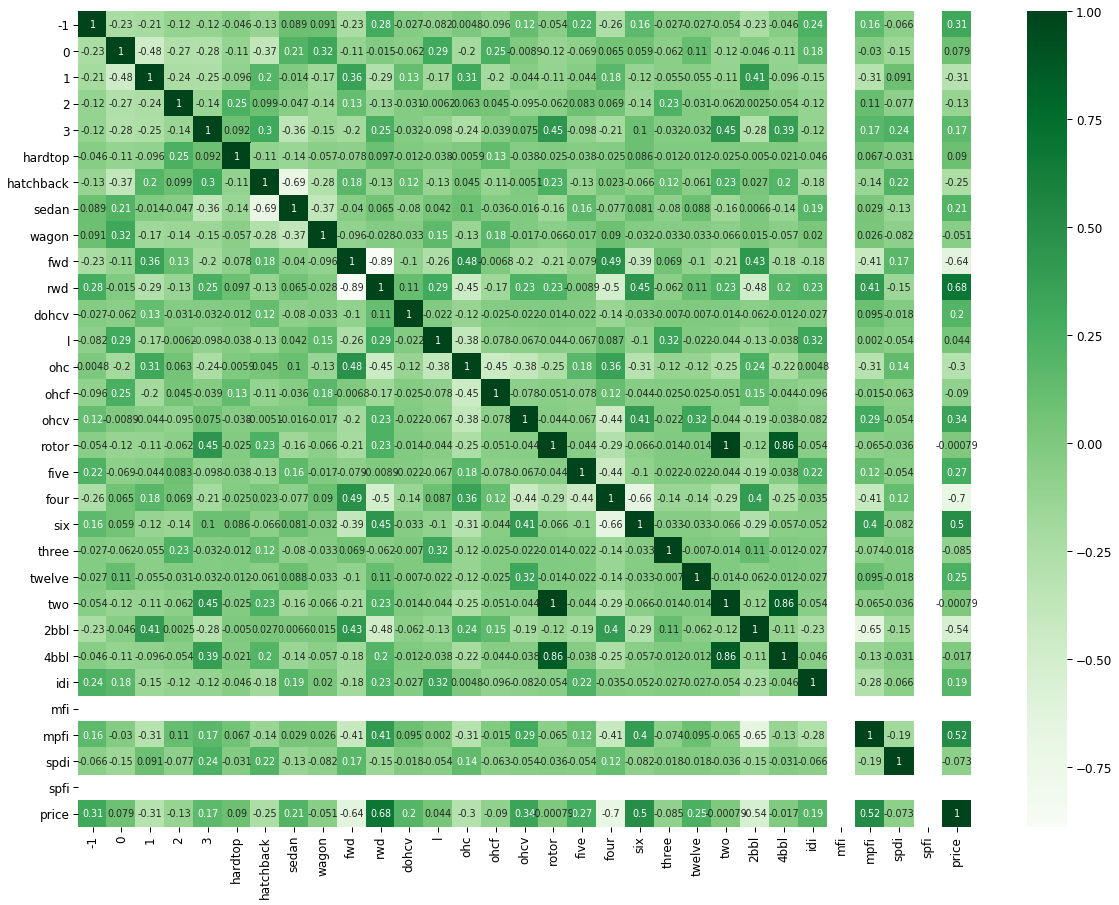

In [94]:
plt.figure(figsize = (20, 15))
sns.set_context("paper", rc={"axes.labelsize":16, "xtick.labelsize":12, "ytick.labelsize":12})
sns.heatmap(df_train_corr2.corr(), cmap= "Greens", annot = True)
plt.show()

#### As we can see from above heatmap, price is highly correlated to enginesize, horsepower, curbweight,carwidth, carlength, wheelbase

### Dividing into X and Y sets for the model building

In [95]:
y_train = df_train.pop('price')
X_train = df_train

## Step 5: Building a linear model

We have around 70 variables. So we will first use the 'automated' way of choosing predictors using RFE. We will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination


In [96]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [97]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [98]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 24),
 ('aspiration', False, 12),
 ('doornumber', False, 51),
 ('enginelocation', True, 1),
 ('wheelbase', False, 13),
 ('carlength', False, 19),
 ('carwidth', True, 1),
 ('carheight', False, 15),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 2),
 ('compressionratio', False, 25),
 ('horsepower', False, 8),
 ('peakrpm', False, 10),
 ('citympg', False, 34),
 ('highwaympg', False, 26),
 (-1, False, 36),
 (0, False, 46),
 (1, False, 48),
 (2, False, 47),
 (3, False, 49),
 ('hardtop', False, 30),
 ('hatchback', False, 29),
 ('sedan', False, 31),
 ('wagon', False, 32),
 ('fwd', False, 56),
 ('rwd', False, 38),
 ('dohcv', False, 11),
 ('l', False, 7),
 ('ohc', False, 53),
 ('ohcf', False, 21),
 ('ohcv', False, 45),
 ('rotor', False, 3),
 ('five', False, 5),
 ('four', False, 4),
 ('six', False, 28),
 ('three', True, 1),
 ('twelve', True, 1),
 ('two', True, 1),
 ('2bbl', False, 33),
 ('4bbl', False, 37),
 ('idi', False, 23),


In [99]:
## Get the columns selected by RFE as predictors.
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'three', 'twelve', 'two', 'bmw', 'porsche'],
      dtype='object')

In [100]:
## Columns which are not selected by RFE as predictors
X_train.columns[~rfe.support_]

Index([        'fueltype',       'aspiration',       'doornumber',
              'wheelbase',        'carlength',        'carheight',
                 'stroke', 'compressionratio',       'horsepower',
                'peakrpm',          'citympg',       'highwaympg',
                       -1,                  0,                  1,
                        2,                  3,          'hardtop',
              'hatchback',            'sedan',            'wagon',
                    'fwd',              'rwd',            'dohcv',
                      'l',              'ohc',             'ohcf',
                   'ohcv',            'rotor',             'five',
                   'four',              'six',             '2bbl',
                   '4bbl',              'idi',              'mfi',
                   'mpfi',             'spdi',             'spfi',
                   'audi',            'buick',        'chevrolet',
                  'dodge',            'honda',            'isu

### Building model using statsmodel, for the detailed statistics

### Model 1

In [101]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [102]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [103]:
#Run the model
lm = sm.OLS(y_train,X_train_rfe).fit()  

In [104]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     137.1
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           1.21e-64
Time:                        20:21:59   Log-Likelihood:                 190.87
No. Observations:                 143   AIC:                            -359.7
Df Residuals:                     132   BIC:                            -327.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1594      0.019     -8.

#### We see that R-squared (0.912) and Adjusted R-Square (0.906) is very good. p_value of  twelve (cylindernumber) = 0.511 which is very high. Lets eliminate this variable and rebuild the model

### Model 2

Rebuilding the model without `twelve`

In [105]:
X_train_new2 = X_train_rfe.drop( ["twelve"], axis = 1)

In [106]:
#Add constant
X_train_lm2 = sm.add_constant(X_train_new2)

In [107]:
## Run the linear model
lm2=sm.OLS(y_train, X_train_lm2).fit()

In [108]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     152.9
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           1.18e-65
Time:                        20:21:59   Log-Likelihood:                 190.63
No. Observations:                 143   AIC:                            -361.3
Df Residuals:                     133   BIC:                            -331.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1587      0.018     -8.

#### As we see, R-squared and Adj R-Squareof Model 2 is same as that of Model 1 which is good. 
#### In model 2 - All p-values are within limit < 0.05. So now lets check VIF for multicollinearity.

In [109]:
X_train_new2.columns

Index(['const', 'enginelocation', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'three', 'two', 'bmw', 'porsche'],
      dtype='object')

In [110]:
## Drop the constant 
X_train_new2 = X_train_new2.drop(['const'], axis=1)

In [111]:
# Calculate the VIFs for the new model - Model 2
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,curbweight,38.41
1,carwidth,24.99
3,enginesize,17.70
4,boreratio,9.70
8,porsche,1.66
0,enginelocation,1.60
6,two,1.21
7,bmw,1.14
5,three,1.01


#### We can see, in Model 2 , many features have high VIF. Lets drop 'curbweight' which has highest VIF

### Model 3

In [112]:
X_train_new3 = X_train_new2.drop(["curbweight"], axis = 1)

Rebuilding the model without `curbweight`

In [113]:
# Adding a constant variable 
X_train_lm3 = sm.add_constant(X_train_new3)

In [114]:
#Run the model
lm3 = sm.OLS(y_train, X_train_lm3).fit()  

In [115]:
#Let's see the summary of our linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     152.5
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           2.01e-63
Time:                        20:21:59   Log-Likelihood:                 182.32
No. Observations:                 143   AIC:                            -346.6
Df Residuals:                     134   BIC:                            -320.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1778      0.019     -9.

#### We can see R-squared and Adjusted R-squared of Model 3 dropped a little bit after dropping 'curbweight'. Still the R-squared is good for Model 3. Lets drop the variable with high p-value of 0.077 i.e boreratio


### Model 4

In [116]:
X_train_new4= X_train_new3.drop(["boreratio"], axis=1)

Rebuilding the model without `boreratio` 

In [117]:
X_train_lm4= sm.add_constant(X_train_new4)

In [118]:
#Run the model
lm4=sm.OLS(y_train, X_train_lm4).fit()


In [119]:
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     171.1
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           7.04e-64
Time:                        20:21:59   Log-Likelihood:                 180.65
No. Observations:                 143   AIC:                            -345.3
Df Residuals:                     135   BIC:                            -321.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1925      0.017    -11.

#### R-Squared and Adj R-Squared are  dropped for Model 4 a little bit after dropping 'boreratio'. Still the R-squared is good for Model 4. Lets drop the variable with high p-value of 0.118 i.e porsche            

### Model 5

In [120]:
X_train_new5= X_train_new4.drop(['porsche'], axis = 1)

Rebuild the model without `porsche`

In [121]:
##Add constant 
X_train_lm5 = sm.add_constant(X_train_new5)

In [122]:
## Run the model
lm5 = sm.OLS(y_train, X_train_lm5).fit()

In [123]:
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     197.0
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           1.62e-64
Time:                        20:21:59   Log-Likelihood:                 179.35
No. Observations:                 143   AIC:                            -344.7
Df Residuals:                     136   BIC:                            -324.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1976      0.017    -11.

#### R-Squared and Adj R-Squared of Model 5 are almost same (with very minor difference) as earlier model - Model 4. All p-values < 0.05. So lets check VIF 

In [124]:
vif = pd.DataFrame()
vif['features'] = X_train_new5.columns
vif['VIF'] = [variance_inflation_factor(X_train_new5.values, i) for i in range(X_train_new5.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by = 'VIF', ascending = False)
vif


,features,VIF
2,enginesize,9.98
1,carwidth,9.63
4,two,1.16
5,bmw,1.13
0,enginelocation,1.08
3,three,1.00


#### Lets drop the feature 'enginesize' which has VIF = 9.98 and rebuild the model   

### Model 6

In [125]:
X_train_new6= X_train_new5.drop(['enginesize'], axis = 1)

Rebuild the model without `enginesize`

In [126]:
##Add constant 
X_train_lm6 = sm.add_constant(X_train_new6)

In [127]:
## Run the model
lm6 = sm.OLS(y_train, X_train_lm6).fit()

In [128]:
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     115.8
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           2.02e-47
Time:                        20:21:59   Log-Likelihood:                 135.20
No. Observations:                 143   AIC:                            -258.4
Df Residuals:                     137   BIC:                            -240.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.2348      0.022    -10.

#### We can see R-squared and adj R-squared dropped considerably after dropping 'enginesize' (R-squared = from 0.897 to 0.809) . So we will keep 'enginesize' variable as it is and drop 'carwidth' instead from Model 5. In short we are ignoring Model 5 for future consideration

### Model 7

In [129]:
X_train_new7= X_train_new5.drop(['carwidth'], axis = 1)

Rebuild the model without `carwidth`

In [130]:
##Add constant 
X_train_lm7 = sm.add_constant(X_train_new7)

In [131]:
## Run the model
lm7 = sm.OLS(y_train, X_train_lm7).fit()

In [132]:
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     138.0
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           1.11e-51
Time:                        20:21:59   Log-Likelihood:                 145.48
No. Observations:                 143   AIC:                            -279.0
Df Residuals:                     137   BIC:                            -261.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0871      0.015     -5.

####  R-squared dropped considerably compared to Model 5 but its better (0.834) than Model 6 (0.809 when we dropped enginesize). Now lets drop 'three' with high p-value = 0.333

### Model 8

In [133]:
X_train_new8= X_train_new7.drop(['three'], axis = 1)

Rebuild the model without `three`

In [134]:
##Add constant 
X_train_lm8 = sm.add_constant(X_train_new8)

In [135]:
## Run the model
lm8 = sm.OLS(y_train, X_train_lm8).fit()

In [136]:
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     172.3
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           1.27e-52
Time:                        20:21:59   Log-Likelihood:                 144.99
No. Observations:                 143   AIC:                            -280.0
Df Residuals:                     138   BIC:                            -265.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0848      0.015     -5.

#### As we see there's hardly any drop in R-squared compared to Model 7. Lets check VIF

In [137]:
vif = pd.DataFrame()
vif['features'] = X_train_new8.columns
vif['VIF'] = [variance_inflation_factor(X_train_new8.values, i) for i in range(X_train_new8.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by = 'VIF', ascending = False)
vif


,features,VIF
1,enginesize,1.12
3,bmw,1.10
0,enginelocation,1.02
2,two,1.00


#### In above model, Model -8 - All p-values are less than 0.05. R-Squared(0.833) and Adjusted R-Squared (0.828) is good. And VIF for all variables is <2 which is good. 

#### Earlier (with scatterplot and heatmap) we saw, there is `high correlation` between 'price' and some variables. Lets try to add them one by one see if its going to improve R-score and Adjusted R-score of our model.

### Model 9

#### Rebuild the model adding `rwd`(drivewheel)

In [138]:
X_train_new9 = X_train[["enginelocation","enginesize","two", "bmw","rwd"]]

In [139]:
##Add constant 
X_train_lm9 = sm.add_constant(X_train_new9)

In [140]:
## Run the model
lm9 = sm.OLS(y_train, X_train_lm9).fit()

In [141]:
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     147.3
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           2.60e-53
Time:                        20:21:59   Log-Likelihood:                 149.42
No. Observations:                 143   AIC:                            -286.8
Df Residuals:                     137   BIC:                            -269.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0744      0.015     -5.

#### We see R-squared and Adjusted R-squared is increased. All p-Values are < 0.05. Lets check VIF.

In [142]:
vif = pd.DataFrame()
vif['features'] = X_train_new9.columns
vif['VIF'] = [variance_inflation_factor(X_train_new9.values, i) for i in range(X_train_new9.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
4,rwd,2.88
1,enginesize,2.52
2,two,1.20
3,bmw,1.15
0,enginelocation,1.03


#### VIF is < 5 for all variables. So Model 9 is good. 

### Model 10

#### Lets add `aspiration` and see the impact

In [143]:
X_train_new10 = X_train[["enginelocation","enginesize","two", "bmw","rwd","aspiration"]]

In [144]:
##Add constant 
X_train_lm10 = sm.add_constant(X_train_new10)

In [145]:
## Run the model
lm10 = sm.OLS(y_train, X_train_lm10).fit()

In [146]:
print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     141.9
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           5.09e-56
Time:                        20:21:59   Log-Likelihood:                 158.70
No. Observations:                 143   AIC:                            -303.4
Df Residuals:                     136   BIC:                            -282.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0851      0.014     -6.

#### We can see adding `aspiration` has increased R-squared (0.862) and Adjusted R-squared (0.856) . p-value of rwd has increased but its < 0.05. So lets check VIF now.

In [147]:
vif = pd.DataFrame()
vif['features'] = X_train_new10.columns
vif['VIF'] = [variance_inflation_factor(X_train_new10.values, i) for i in range(X_train_new10.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
4,rwd,2.90
1,enginesize,2.70
5,aspiration,1.25
2,two,1.21
3,bmw,1.18
0,enginelocation,1.04


#### VIF is < 3 which is quite good. Overall Model 10 looks good.

#### Lets try adding one more variable `ohcv (enginetype)`

### Model 11

In [148]:
X_train_new11 = X_train[["enginelocation","enginesize","two", "bmw","rwd", "aspiration","ohcv"]]

In [149]:
##Add constant 
X_train_lm11 = sm.add_constant(X_train_new11)

In [150]:
## Run the model
lm11 = sm.OLS(y_train, X_train_lm11).fit()

In [151]:
print(lm11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     124.0
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           1.37e-55
Time:                        20:22:00   Log-Likelihood:                 160.33
No. Observations:                 143   AIC:                            -304.7
Df Residuals:                     135   BIC:                            -281.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0940      0.015     -6.

#### We see in Model 11, p-value of `ohcv` is 0.080 which is > 0.05. That means this variable is not significant. So `we will ignore Model 11 for further consideration`.

In [152]:
#### Lets try adding one more variable `ohcv (enginetype)`

### Model 12

In [153]:
X_train_new12 = X_train[["enginelocation","enginesize","two", "bmw","rwd", "aspiration","mpfi"]]

In [154]:
##Add constant 
X_train_lm12 = sm.add_constant(X_train_new12)

In [155]:
## Run the model
lm12 = sm.OLS(y_train, X_train_lm12).fit()

In [156]:
print(lm12.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     123.5
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           1.72e-55
Time:                        20:22:00   Log-Likelihood:                 160.09
No. Observations:                 143   AIC:                            -304.2
Df Residuals:                     135   BIC:                            -280.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0873      0.014     -6.

#### We see in Model 11, p-value of `mpfi` is 0.106 which is > 0.05. That means this variable is not significant. So `we will ignore Model 12 for further consideration`.

#### Now lets look at cylindernumber. Our model 'Model 10' has selected 'two' as predictor. But if we see the correlation of cylindernumber with price & boxplot, cylindernumber = twelve seems to have bigger impact on price.  


In [157]:
df_train_corr2["twelve"].corr(df_train_corr2["price"])

0.24748905813587932

In [158]:
df_train_corr2["two"].corr(df_train_corr2["price"])

-0.0007925608677706725

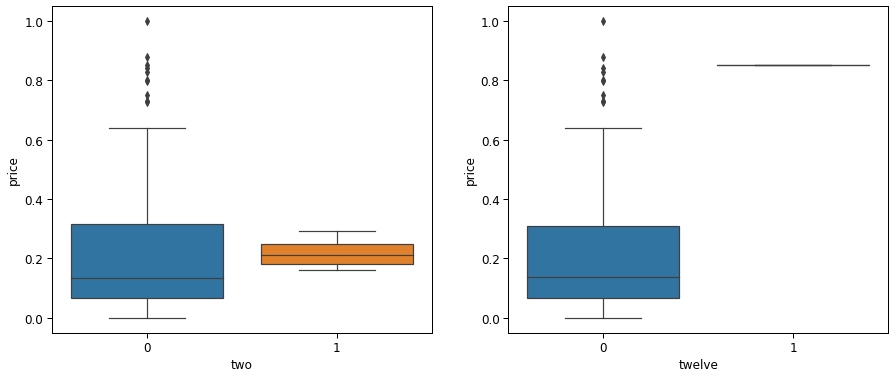

In [159]:
plt.figure(figsize=(15,6))
sns.set_context( rc={"axes.labelsize":12, "xtick.labelsize":12, "ytick.labelsize":12})
plt.subplot(1,2,1)
sns.boxplot(x = 'two', y = 'price', data = df_train_corr2)
plt.subplot(1,2,2)
sns.boxplot(x = 'twelve', y = 'price', data = df_train_corr2)
plt.show()

#### Lets add variable `twelve` (cylindernumber) in Model 10 and see the impact on model

### Model 13

In [160]:
X_train_new13 = X_train[["enginelocation","enginesize","two", "bmw","rwd", "aspiration","twelve"]]

In [161]:
##Add constant 
X_train_lm13 = sm.add_constant(X_train_new13)

In [162]:
## Run the model
lm13 = sm.OLS(y_train, X_train_lm13).fit()

In [163]:
print(lm13.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     127.1
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           3.25e-56
Time:                        20:22:00   Log-Likelihood:                 161.87
No. Observations:                 143   AIC:                            -307.7
Df Residuals:                     135   BIC:                            -284.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0983      0.015     -6.

In [164]:
vif = pd.DataFrame()
vif['features'] = X_train_new13.columns
vif['VIF'] = [variance_inflation_factor(X_train_new13.values, i) for i in range(X_train_new13.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
1,enginesize,3.00
4,rwd,2.93
5,aspiration,1.28
2,two,1.21
3,bmw,1.19
6,twelve,1.15
0,enginelocation,1.04


#### As we see after adding variable 'twelve' (cylindernumber) R-squared and Adjusted R-squared has `marginally` increased. p-values are within limit and VIF is good.  Overall Model 13 is as good as Model 10.

### In summary, we have 2 good models 
- `Model 10` (R-squared = 0.862 and Adjusted R-squared = 0.856)
- `Model 13` (R-squared = 0.868 and Adjusted R-squared = 0.861)
- We will evalluate both these models for their performance on test dataset. 
- Before that we will carry out Residual analysis

## Step 7(A): Residual Analysis of the train data (Model 13)

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [165]:

y_train_pred = lm13.predict(X_train_lm13)

Text(0.5, 0, 'Errors')

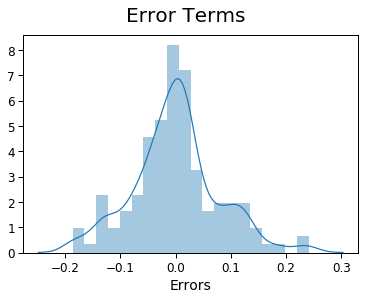

In [166]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 14)    

#### We can see that Error terms are normally distributed with mean =0, though the curve is not smooth.

Text(0, 0.5, 'Errors')

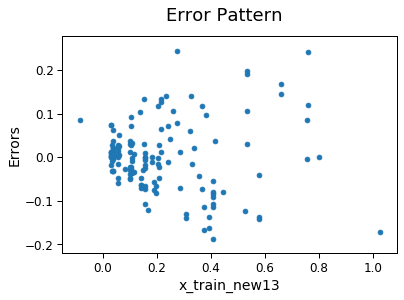

In [194]:
fig = plt.figure()
plt.scatter( y_train_pred, y_train - y_train_pred)
fig.suptitle('Error Pattern', fontsize = 18)                  # Plot heading 
plt.xlabel('x_train_new13', fontsize = 14)
plt.ylabel('Errors', fontsize = 14) 

#### We see above that Error terms are randomly distributed around mean =0. The variance is not constant as expected but its not uncommon not to have constant variance. 

## Step 8(A): Making Predictions Using Model 13

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

#### Scaling

In [168]:
## Make a copy of df_test as df_test_rev1
df_test_rev1 = df_test.copy()

In [169]:
# Apply scaler() to all the columns except the '1-0' and 'dummy' variables
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight','enginesize',"boreratio","stroke","compressionratio","horsepower","peakrpm","citympg","highwaympg","price"]

df_test_rev1[num_vars] = scaler.transform(df_test_rev1[num_vars])

In [170]:
y_test = df_test_rev1.pop('price')
X_test = df_test_rev1

In [171]:
# Now let's use our model - Model 13 to make predictions.

# Creating X_test_new13 dataframe by dropping variables from X_test

X_test_new13 = X_test[X_train_new13.columns]

# Adding a constant variable 

X_test_new13 = sm.add_constant(X_test_new13)

In [172]:
# Making predictions using model (Model 13)

y_test_pred = lm13.predict(X_test_new13)

## Model 13 Evaluation

Text(0, 0.5, 'y_test_pred')

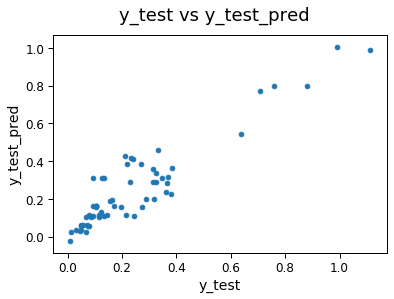

In [173]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=18)              # Plot heading 
plt.xlabel('y_test', fontsize=14)                         
plt.ylabel('y_test_pred', fontsize=14)                          

#### Calculate R-Squared on test 

In [174]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [175]:
r_squared_test = r2_score(y_true = y_test, y_pred = y_test_pred)

In [176]:
print(r_squared_test)

0.8571412862291607


In [177]:
r_squared_train = r2_score(y_true = y_train, y_pred = y_train_pred)

In [178]:
print(r_squared_train)

0.8682490413076652


#### As we see the r-squared of `Model 13` on test data is as good as r-squared of model on train data. The difference is ((0.868 - 0.857)/0.868 * 100) = 1.3 % . That signifies that our model (Model 13) is working as good on 'test' data as on 'train' data.

## Step 7(B): Residual Analysis of the train data (Model 10)

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [179]:

y_train_pred = lm10.predict(X_train_lm10)

Text(0.5, 0, 'Errors')

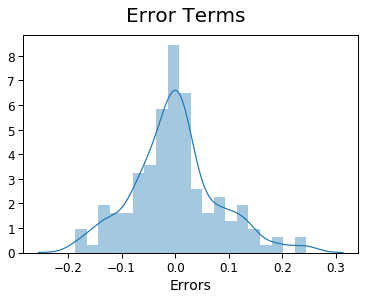

In [180]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 14)    

#### We can see that Error terms are normally distributed with mean =0, though the curve is better than Model 13

Text(0, 0.5, 'Errors')

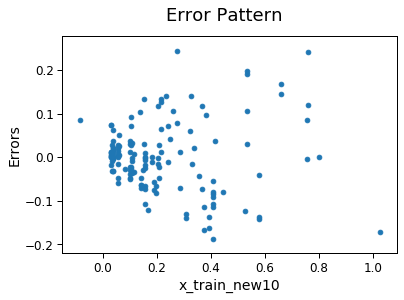

In [193]:
fig = plt.figure()
plt.scatter( y_train_pred, y_train - y_train_pred)
fig.suptitle('Error Pattern', fontsize = 18)                  # Plot heading 
plt.xlabel('x_train_new10', fontsize = 14)
plt.ylabel('Errors', fontsize = 14) 

#### We see above that Error terms are randomly distributed around mean =0. The variance is not constant as expected but its not uncommon not to have constant variance. 

## Step 8(B): Making Predictions Using Model 10

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

#### Scaling

In [182]:
## Make a copy of df_test as df_test_rev1
df_test_rev2 = df_test.copy()

In [183]:
# Apply scaler() to all the columns except the '1-0' and 'dummy' variables
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight','enginesize',"boreratio","stroke","compressionratio","horsepower","peakrpm","citympg","highwaympg","price"]

df_test_rev2[num_vars] = scaler.transform(df_test_rev2[num_vars])

In [184]:
y_test = df_test_rev2.pop('price')
X_test = df_test_rev2

In [185]:
# Now let's use our model - Model 10 to make predictions.

# Creating X_test_new10 dataframe by dropping variables from X_test

X_test_new10 = X_test[X_train_new10.columns]

# Adding a constant variable 

X_test_new10 = sm.add_constant(X_test_new10)

In [186]:
# Making predictions using model (Model 10)

y_test_pred = lm10.predict(X_test_new10)

## Model 10 Evaluation

Text(0, 0.5, 'y_test_pred')

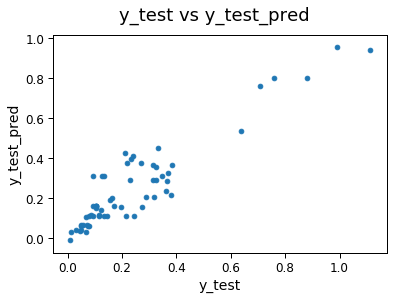

In [187]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=18)             
plt.xlabel('y_test', fontsize=14)                        
plt.ylabel('y_test_pred', fontsize=14)                         

#### Calculate R-Squared on test 

In [188]:
r_squared_test = r2_score(y_true = y_test, y_pred = y_test_pred)

In [189]:
print(r_squared_test)

0.8579490407043358


In [190]:
r_squared_train = r2_score(y_true = y_train, y_pred = y_train_pred)

In [191]:
print(r_squared_train)

0.8622873788155658


#### As we see the r-squared of `Model 10` on test data is as good as r-squared of model on train data. The difference is ((0.862 - 0.858)/0.862 * 100) = 0.6 % which is less than 1%. That signifies that our model (Model 10) is working as good on 'test' data as on 'train' data.

####  We have 2 good models at hand. Both of them almost same R-squared and Adjusted R-squared.: We choose `Model 10` as final model because the difference between R-squared train and R-squared test is least for Model 10 which is 0.6%

We can see that the equation of our best fitted line is:

$ price = 0.3  \times  enginelocation + 1.058  \times  enginesize + 0.2047 \times two + 0.1996 \times bmw + 0.0528 \times rwd + 0.079 \times aspiration - 0.0851 $
